In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy import inspect
import numpy as np
import re 
import string
import nltk
from nltk.corpus import stopwords
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from wordcloud import WordCloud# ,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [3]:
df = pd.read_csv('smallPosts.csv')

In [4]:
df.head()

,ID_Post,ID_Parent_Post,ID_Article,ID_User,CreatedAt,Status,Headline,Body,PositiveVotes,NegativeVotes,Is_Staff,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,394474,394472.0,4610,27485,2015-10-20 23:41:10,online,Wer sind die Wackler ?,NaN,0,0,0,1,1,1,4,0,0,1,0,4.000000
1,813352,813291.0,9733,4442,2016-03-24 10:41:56,online,...wenn sie diese wohnungen ganauer ansehen ko...,"heizwärmebedarf für eine wohnung (97m2) 82,4kw...",0,0,0,5,47,40,360,26,0,0,15,6.553191
2,126792,126753.0,1725,21802,2015-07-17 22:36:43,online,NaN,Gibts keinen Preis für hohles pseudolinkes Ger...,2,5,0,1,44,38,286,6,0,11,19,5.522727
3,529752,NaN,6256,27257,2015-12-10 15:12:35,online,NaN,Lockheed hat die Kernfusion doch schon längst ...,0,6,0,1,9,9,59,4,0,2,3,5.666667
4,264521,NaN,3137,20906,2015-09-03 14:05:30,online,"Ich wart schon länger auf ; ""Diamond is unbrea...",http://isdiamondisunbreakableconfirmed.tumblr....,0,1,0,1,1,1,50,6,0,0,0,50.000000


In [29]:
categorical_columns = ['ID_Post','ID_Parent_Post','ID_Article','ID_User','Status','Headline','Body','Is_Staff']
numerical_columns = ['PositiveVotes','NegativeVotes','count_sent','count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len']

In [30]:
df[categorical_columns].astype('category').describe()

,ID_Post,ID_Parent_Post,ID_Article,ID_User,Status,Headline,Body,Is_Staff
count,1000,679.0,1000,1000,1000,374,937,1000
unique,1000,679.0,802,889,2,374,936,2
top,1011383,1009727.0,12075,28969,online,"„Aug´um Aug´, Zahn um Zahn"" sollte eigentlich ...",Wir schaffen das!,0
freq,1,1.0,7,4,944,1,2,997


In [31]:
df[numerical_columns].describe()

,PositiveVotes,NegativeVotes,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,3.445000,1.155000,2.025000,30.267000,26.878000,203.779000,6.991000,0.384000,6.803000,13.47400,6.501937
std,7.024266,3.375258,1.949404,29.961565,24.639444,201.873924,7.051854,1.587786,7.862698,14.00305,8.665089
min,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,2.000000
25%,0.000000,0.000000,1.000000,8.000000,8.000000,53.000000,2.000000,0.000000,1.000000,3.00000,4.903148
50%,1.000000,0.000000,1.000000,20.000000,19.000000,130.000000,5.000000,0.000000,4.000000,9.00000,5.500000
75%,4.000000,1.000000,3.000000,43.000000,38.250000,291.000000,10.000000,0.000000,10.000000,20.00000,6.184466
max,88.000000,37.000000,21.000000,135.000000,100.000000,758.000000,45.000000,42.000000,41.000000,71.00000,128.000000


In [34]:
#parses this column into timestamps

df['CreatedAt'] = df['CreatedAt'].apply(parser.parse)

In [36]:
df['CreatedAt'].describe()

count                    1000
unique                   1000
top       2015-07-29 10:26:27
freq                        1
first     2013-06-02 08:05:29
last      2016-06-10 14:27:12
Name: CreatedAt, dtype: object

In [37]:
# by substituting the year with other arguments such as moth, day, hour or date, we can gain interesting insights

df.groupby(df.CreatedAt.dt.year).count()

,ID_Post,ID_Parent_Post,ID_Article,ID_User,CreatedAt,Status,Headline,Body,PositiveVotes,NegativeVotes,Is_Staff,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
CreatedAt,,,,,,,,,,,,,,,,,,,,
2013,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015,566,379,566,566,566,566,225,523,566,566,566,566,566,566,566,566,566,566,566,566
2016,432,300,432,432,432,432,147,412,432,432,432,432,432,432,432,432,432,432,432,432


In [59]:
#a random example of deleted comments
(list(df['Body'][df.Status == 'deleted'].dropna().sample(1))[0])

'Von Immunologie, Virologie, Biochemie und Medizin haben Sie - darin dem Standard-Troll sehr ähnlich - haben Sie keine Ahnung. Wie denn auch, es fehlt Ihnen die Ausbildung.\r\r\n\r\r\nJetzt wissen wir, dass Sie auch in Psychologie versagen.'

In [64]:
df.ID_Post.groupby(df.Status).count()

Status
deleted     56
online     944
Name: ID_Post, dtype: int64

In [70]:
num_of_records = df.shape[0]
num_of_users = df.groupby(['ID_User']).count().shape[0]
num_of_articles = df.groupby(['ID_Article']).count().shape[0]

In [71]:
num_of_records

1000

In [72]:
num_of_users

889

In [73]:
num_of_articles

802

In [66]:
#comparing the distribution of number of words

trace0 = go.Box(
    y = df['count_word'][df.Status == 'deleted'],
    name = 'Deleted',
    #marker= dict(color = 'rgb(214, 12, 140)')
)
trace1 = go.Box(
    y = df['count_word'][df.Status == 'online'],
    name = 'Online',
    #marker= dict(color = 'rgb(214, 12, 140)')
)
data = [trace0, trace1]
py.offline.iplot(data)

In [3]:
engine = sqlalchemy.create_engine('mysql+mysqlconnector://bayan:@localhost/corpus')
posts = pd.read_sql_table('posts', engine, schema=None, index_col=None, coerce_float=False)# parse_dates=None, columns=None, chunksize=None


In [74]:
#### uncomment this section if you want to have a summerization of the sql database


#inspector = inspect(engine)

#for table_name in inspector.get_table_names():
#    print("Table: " + table_name)
#    for column in inspector.get_columns(table_name):
#        print("\tColumn: %s" % column['name'])

In [5]:
articles = pd.read_sql_table('articles', engine, schema=None, index_col=None, coerce_float=False)

In [12]:
articles.head()

,ID_Article,Path,publishingDate,Title,Body
0,1,Newsroom/User/Community,2012-05-26 03:00:19,Die Newsletter von derStandard.at,"<div class=""section"" id=""content-main"" itempro..."
1,2,Newsroom/User/Community/Regeln,2012-05-26 12:12:19,Werden Sie Teil von derStandard.at!,"<div class=""diashow"" id=""objectContent""><meta ..."
2,3,Diverses/mobil,2013-11-22 12:15:00,Die Android App von derStandard.at,"<div class=""section"" id=""content-main"" itempro..."
3,4,Newsroom/User/mitmachen/Mitreden,2014-08-13 05:30:00,Welche Erfahrungen haben Sie als Linkshänder g...,"<div class=""section"" id=""content-main"" itempro..."
4,5,Newsroom/User/mitmachen/Mitreden,2014-08-27 12:27:01,Wie haben Sie das Jahr 1989 erlebt?,"<div class=""section"" id=""content-main"" itempro..."


In [52]:
#import numpy as np
#posts['is_staff'] = np.nan

In [3]:
staff = pd.read_sql_table('newspaper_staff', engine, schema=None, index_col=None, coerce_float=False)
staff.head()

,ID_User
0,123
1,383
2,407
3,461
4,497


In [4]:
posts['Is_Staff'] = 0

In [89]:
#posts.loc[posts['ID_User'] == 123]

In [69]:
#posts.loc[posts['ID_User'] == 123]['Is_Staff'] = 1

C:\Users\bayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
for i in staff['ID_User']:
    posts.loc[posts['ID_User'] == i,'Is_Staff'] = 1

In [9]:
posts.loc[posts['Is_Staff'] == 1]

,ID_Post,ID_Parent_Post,ID_Article,ID_User,CreatedAt,Status,Headline,Body,PositiveVotes,NegativeVotes,Is_Staff
47,48,NaN,1,9700,2011-02-16 10:30:37,deleted,,,0,0,1
49,50,49.0,1,9700,2011-05-13 16:45:08,online,,Können Sie uns bitte eine Mail mit Ihren Zugan...,0,0,1
51,52,51.0,1,9700,2011-05-16 09:53:35,online,,Vielen Dank für Ihre Anregung! Wir werden sie ...,1,0,1
53,54,53.0,1,9700,2011-05-23 11:15:08,online,,Zurzeit liegt das Thema in unserer Technik-Abt...,0,0,1
55,56,55.0,1,9700,2011-07-18 08:08:39,online,,Den Newsletter können Sie für die Dauer Ihres ...,0,0,1
71,72,71.0,1,9700,2013-02-01 11:32:40,online,,"Im Telefonnummer-Feld sehen Sie, wie die Numme...",0,0,1
73,74,73.0,1,9700,2013-04-10 16:24:46,online,,"Ja, leider. Wir beheben das nicht mehr in der ...",1,0,1
77,78,77.0,1,5740,2014-08-21 13:49:19,online,,Es gibt keinen eigenen Newsletter für Wissensc...,0,0,1
79,80,79.0,1,9700,2015-06-01 09:36:36,online,None,Hier finden Sie unsere wichtigsten Kontakte: \...,0,0,1
81,82,81.0,1,9700,2015-10-05 10:44:31,online,None,"Lieber User la paloma,\r\n\r\nWenn Sie ein Pos...",2,0,1


In [92]:
#posts.groupby('CreatedAt').count()

In [93]:
posts['CreatedAt'].describe()

count                 1011773
unique                 986324
top       2016-04-12 10:06:52
freq                        4
first     2003-04-23 14:52:42
last      2016-07-21 14:52:34
Name: CreatedAt, dtype: object

In [40]:
from dateutil import parser

In [24]:
# df['CreatedAt'] = df['CreatedAt'].apply(parser.parse)

In [6]:
smallPosts = posts.sample(1000)
smallPosts=smallPosts.reset_index(drop=True)
df.to_csv('PostsExtended.csv',index=False)

In [29]:

#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
### this cell is for adding the derived features (like number of words, etc.) to our main dataframe


de_stopwords = set(stopwords.words("german"))
## Indirect features

#Sentense count in each comment:
    #  '\n' can be used to count the number of sentences in each comment
df['count_sent']=df["Body"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["Body"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["Body"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["Body"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["Body"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["Body"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["Body"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["Body"].apply(lambda x: len([w for w in str(x).lower().split() if w in de_stopwords]))
#Average length of the words
df["mean_word_len"] = df["Body"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\Users\bayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning:

Mean of empty slice.



In [77]:
df.isnull().any(axis=1).sum()

852

In [78]:
layout = go.Layout(
    title='missing data',
    )

trace1 = go.Pie(
    labels=['Without missing values', 'With missing values'],
    values=[df.shape[0]-df.isnull().any(axis=1).sum(),df.isnull().any(axis=1).sum()],
   # marker={'colors':}
    )

fig = go.Figure(data=[trace1],layout = layout)

py.offline.iplot(fig)

In [80]:
trace = go.Table(
    header=dict(values=['File Size', 'Number of Rows', 'Numer of Columns']),
    cells=dict(values=[[100],[50],[70]]))

data = [trace] 
#py.offline.iplot(data, filename = 'basic_table')

In [81]:
cols = ["ID_Article","CreatedAt","Body"]


trace1 = go.Bar(
    x=cols,
    y=[df[col].isnull().sum() for col in cols],
    name='null'
)
trace2 = go.Bar(
    x=cols,
    y=[df[col].count() for col in cols],
    name='not null'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [82]:
cols = ["ID_Post","ID_Article","CreatedAt","Body","Status", "ID_Parent_Post"]


layout = go.Layout(
    title='Usable Data',
    )

trace1 = go.Pie(
    labels=['Without missing values', 'With missing values'],
    values=[df.loc[:,cols].shape[0]-df.loc[:,cols].isnull().any(axis=1).sum(),df.loc[:,cols].isnull().any(axis=1).sum()]
    )

fig = go.Figure(data=[trace1],layout = layout)

py.offline.iplot(fig)

In [83]:
layout = go.Layout(
    title='Deleted comments',
    )

trace1 = go.Pie(
    labels=['Deleted', 'Online'],
    values=[(df.Status == 'deleted').sum(),(df.Status == 'online').sum()]
    )

fig = go.Figure(data=[trace1],layout = layout)

py.offline.iplot(fig)

In [91]:

cols = ['count_sent','count_word','count_unique_word']#			count_letters	count_punctuations	count_words_upper	count_words_title	count_stopwords
data = []
for col in cols:
    Online = {
                "type": 'violin',
                "x": col,
                "y": df[col] [ df['Status'] == 'online' ],
                "legendgroup": 'Online',
                "scalegroup": 'Online',
                "name": col,
                "side": 'negative',
                "box": {
                    "visible": True
                },
                "meanline": {
                    "visible": True
                },
                "line": {
                    "color": 'blue'
                },
                "showlegend": False
            }
    data.append(Online)
    Deleted= {
                "type": 'violin',
                "x": col,
                "y": df[col] [ df['Status'] == 'deleted' ],
                "legendgroup": 'Deleted',
                "scalegroup": 'Deleted',
                "name": col,
                "side": 'positive',
                "box": {
                    "visible": True
                },
                "meanline": {
                    "visible": True
                },
                "line": {
                    "color": 'green'
                },
                "showlegend": False
            }
    data.append(Deleted)
    
fig = {
        "data": data,
        "layout" : {
        #"title": "Total bill distribution<br><i>scaled by number of bills per gender",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        #"violingroupgap": 0,
        "violinmode": "overlay"
    }
    }


py.offline.iplot(fig, filename = 'violin/split', validate = False)

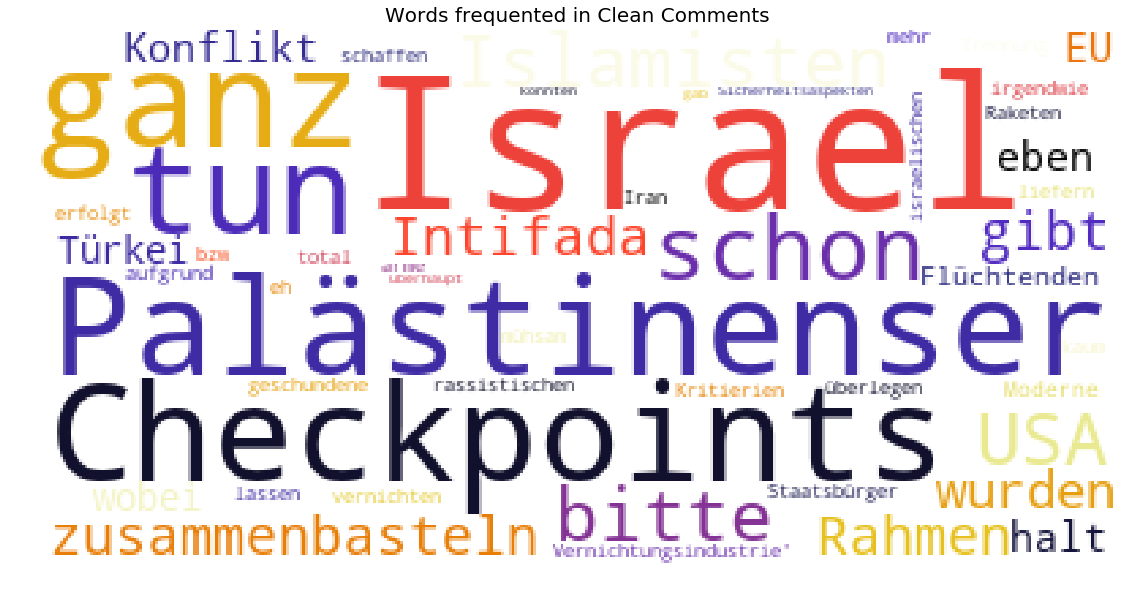

In [95]:
de_stopwords = set(stopwords.words("german"))
de_stopwords.update(['dass'])


#clean_mask=np.array(Image.open("../input/imagesforkernal/safe-zone.png"))
#clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=df[df.Status=='deleted'].dropna()
text=subset.Body.values
wc= WordCloud(background_color="white",max_words=50,stopwords=de_stopwords)#,mask=clean_mask
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'CMRmap_r' , random_state=17), alpha=0.98)
plt.show()

In [97]:
np.corrcoef(df.iloc[:, 12:])

array([[1.        , 0.60800087, 0.61347587, ..., 0.74057684, 0.62639147,
        0.64398068],
       [0.60800087, 1.        , 0.99667977, ..., 0.97204564, 0.99695464,
        0.99592618],
       [0.61347587, 0.99667977, 1.        , ..., 0.97855847, 0.99961494,
        0.98844544],
       ...,
       [0.74057684, 0.97204564, 0.97855847, ..., 1.        , 0.98228925,
        0.97280364],
       [0.62639147, 0.99695464, 0.99961494, ..., 0.98228925, 1.        ,
        0.99043837],
       [0.64398068, 0.99592618, 0.98844544, ..., 0.97280364, 0.99043837,
        1.        ]])

In [99]:
features1=list(['count_sent','count_word','count_unique_word'])
#features2=list(['Cat1', 'Cat2','num1','num2'])
df[features1].corr()
#df[[features2]].corr()

,count_sent,count_word,count_unique_word
count_sent,1.000000,0.555201,0.558206
count_word,0.555201,1.000000,0.994955
count_unique_word,0.558206,0.994955,1.000000


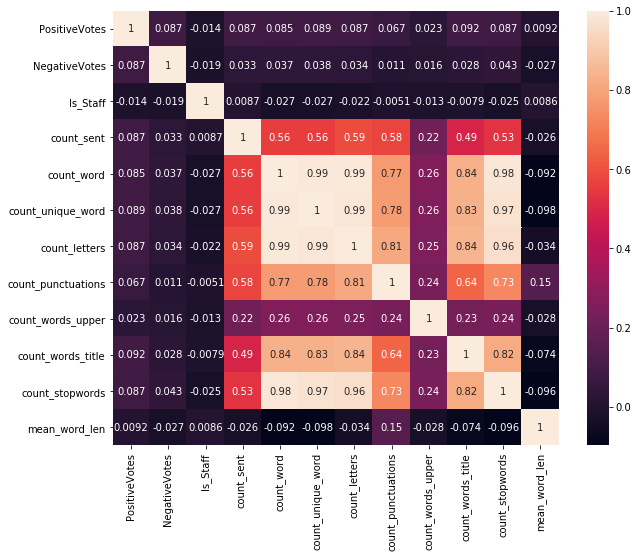

In [101]:
temp_df=df.iloc[:,5:]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)